In [43]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [44]:
df = yf.download('BTC-USD')
df.columns = df.columns.droplevel(1)
df.tail(5)

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Date,,,,,
2025-03-17,84075.687500,84725.328125,82492.156250,82576.335938,25092785558
2025-03-18,82718.500000,84075.718750,81179.992188,84075.718750,24095774594
2025-03-19,86854.226562,87021.187500,82569.726562,82718.804688,34931960257
2025-03-20,84167.195312,87443.265625,83647.195312,86872.953125,29028988961
2025-03-22,84071.234375,84763.195312,83282.804688,84175.250000,19057371136


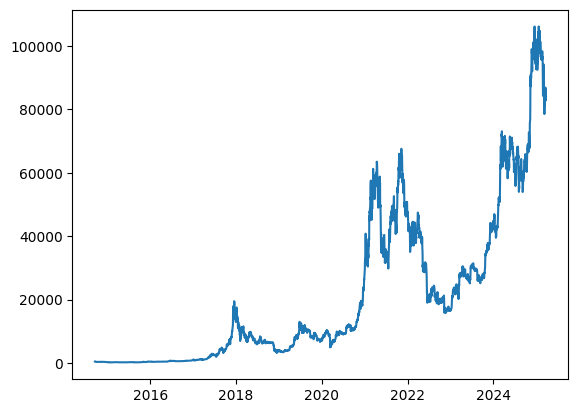

In [45]:
plt.plot(df.index, df['Close'])

In [46]:
#Train test split

In [47]:
to_row = int(len(df)*0.9)
print(to_row)

training_data = list(df[0:to_row]['Close'])
testing_data = list(df[to_row:]['Close'])


3455


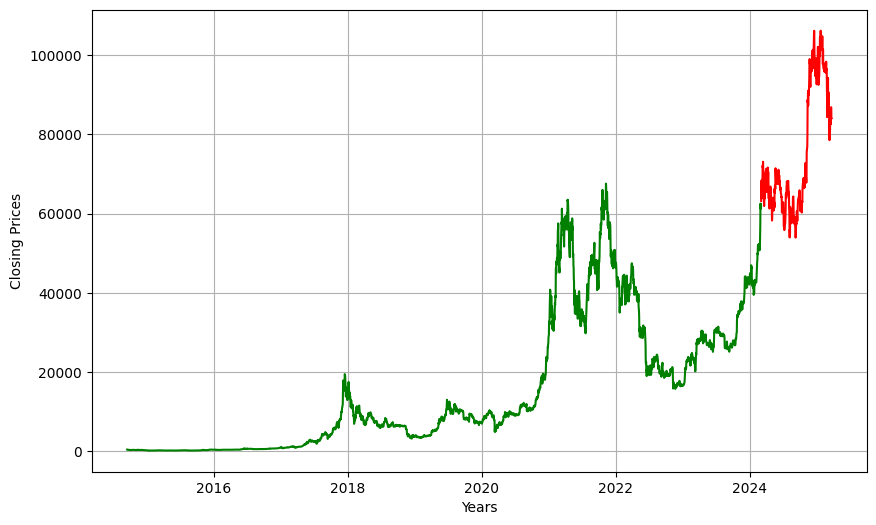

In [48]:
plt.figure(figsize = (10,6))
plt.grid(True)
plt.xlabel('Years')
plt.ylabel('Closing Prices')
plt.plot(df[0:to_row]['Close'], 'green', label = 'Train Data')
plt.plot(df[to_row:]['Close'], 'red', label = 'Test Data')

In [49]:
model_predictions = []

number_testing_data = len(testing_data)

In [56]:
for i in range(number_testing_data):
    model = ARIMA(training_data, order = (4,1,0))
    model_fit = model.fit() #It learns the coefficients of the model based on the data you've provided (training_data).
    output = model_fit.forecast() #This forecasts the next time step (by default, 1 step ahead) using the model that was just trained.
    y_hat = list(output)[0]
    model_predictions.append(y_hat)
    actual_test_value = testing_data[i]

    training_data.append(actual_test_value)
    
    

# 4 is the number of lag observation included in the model (lag order) (AR)
# 1 in the number of times that the raw observation are differenced, (degree of differencing)(I)
# 0 is the size of the moving averange window (MA) Don’t use any past forecast errors.

In [122]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 3838
Model:                 ARIMA(4, 1, 0)   Log Likelihood              -31961.365
Date:                Sat, 22 Mar 2025   AIC                          63932.730
Time:                        16:25:39   BIC                          63963.993
Sample:                             0   HQIC                         63943.836
                               - 3838                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0522      0.008     -6.692      0.000      -0.068      -0.037
ar.L2          0.0048      0.009      0.561      0.575      -0.012       0.022
ar.L3          0.0097      0.009      1.033      0.301      -0.009       0.028
ar.L4          0.0248      0.008      3.106      0.002       0.009       0.041
sigma2      1.007e+06   8537.468    117.979      0.000    9.91e+05    1.02e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             26951.81
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):              26.76   Skew:                             0.22
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [84]:
#Forecast for the next trading day
final_model = ARIMA(training_data, order=(4, 1, 0))
final_model_fit = final_model.fit()

# Forecast the next trading day's closing price
next_day_forecast = final_model_fit.forecast()[0]

print("Forecast for the next trading day:", next_day_forecast)

Forecast for the next trading day: 84070.73162700362


In [109]:
len(testing_data)

384

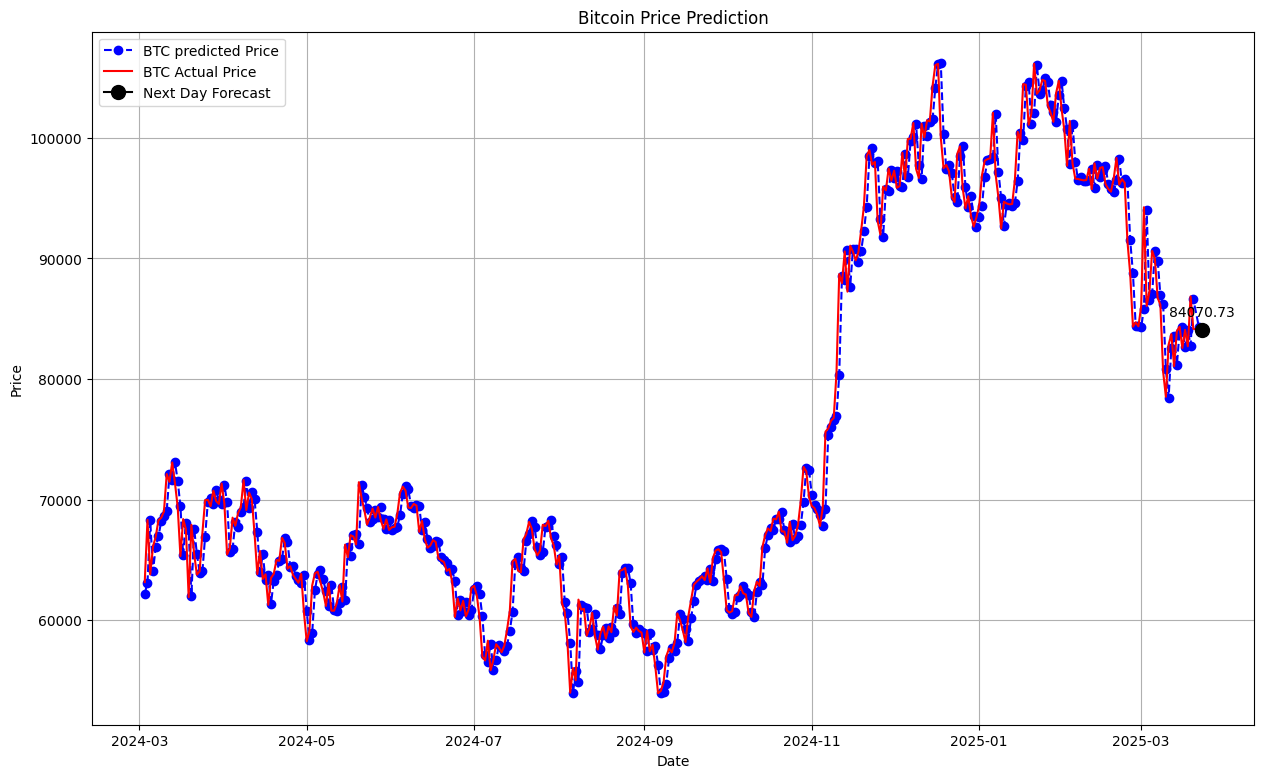

Next day forecast: 84070.73162700362
Type: <class 'numpy.float64'>


In [120]:
plt.figure(figsize = (15,9))
plt.grid(True)

date_range = df[to_row:].index

last_date = date_range[-1]
day_after_last_date = pd.date_range(last_date, periods = 2, freq = 'D')[1]

plt.plot(date_range, model_predictions, color = 'blue', marker = 'o', linestyle = 'dashed', label='BTC predicted Price')
plt.plot(date_range, testing_data, color = 'red', label='BTC Actual Price')

plt.plot([day_after_last_date], [next_day_forecast], color = 'black', markersize = 10, label = 'Next Day Forecast', marker = 'o')
plt.annotate(f'{next_day_forecast:.2f}', 
             (day_after_last_date, next_day_forecast),
             textcoords="offset points", xytext=(0,10),
             ha='center', fontsize=10, color='black')


plt.title('Bitcoin Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

print("Next day forecast:", next_day_forecast)
print("Type:", type(next_day_forecast))



In [121]:
mape = np.mean(np.abs(np.array(model_predictions) - np.array(testing_data))/np.abs(testing_data))
print('MAPE: '+str(mape))
print(1-mape)
# 2.020482% MAPE (Mean Absolute Percentage Error) implies the model is about 97.9517% accuratein predicting the test set observations.

MAPE: 0.02048299554754189
0.9795170044524582
